In [72]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

In [73]:
# Load the Iris dataset
iris_data = pd.read_csv(r"C:\Users\DELL\Downloads\Iris.csv")

In [105]:
iris_data = iris_data.drop('Id', axis=1)

In [107]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
# check for duplicates
duplicate_rows = iris_data.duplicated().sum()

In [77]:
print('Number of duplicate rows = ', duplicate_rows)

Number of duplicate rows =  0


In [78]:
# Split the Data into Training and Testing Sets

# step 1: Separate the features (X) and target (y)
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dimensions of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (120, 5)
Test set size: (30, 5)


In [79]:
# Normalize the data using StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)

# Check the mean and standard deviation of the scaled training data
print(f"Mean of scaled training data: {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of scaled training data: {X_train_scaled.std(axis=0)}")

Mean of scaled training data: [4.44089210e-17 6.51330841e-16 7.54951657e-16 1.92438658e-16
 1.44328993e-16]
Standard deviation of scaled training data: [1. 1. 1. 1. 1.]


In [80]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the mean and standard deviation of the scaled training data
print(f"Mean of scaled training data: {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of scaled training data: {X_train_scaled.std(axis=0)}")

Mean of scaled training data: [4.44089210e-17 6.51330841e-16 7.54951657e-16 1.92438658e-16
 1.44328993e-16]
Standard deviation of scaled training data: [1. 1. 1. 1. 1.]


In [81]:
# Initialize the Support Vector Machine classifier (SVC)
svm = SVC(kernel='linear', random_state=42)

# train the model
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Display the predicted values
print(f"Predictions: {y_pred}")

Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


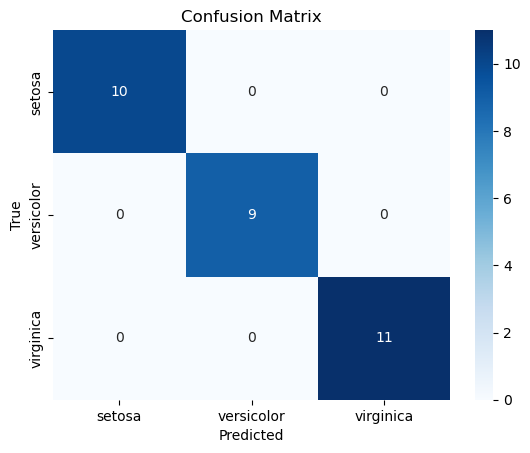

In [93]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

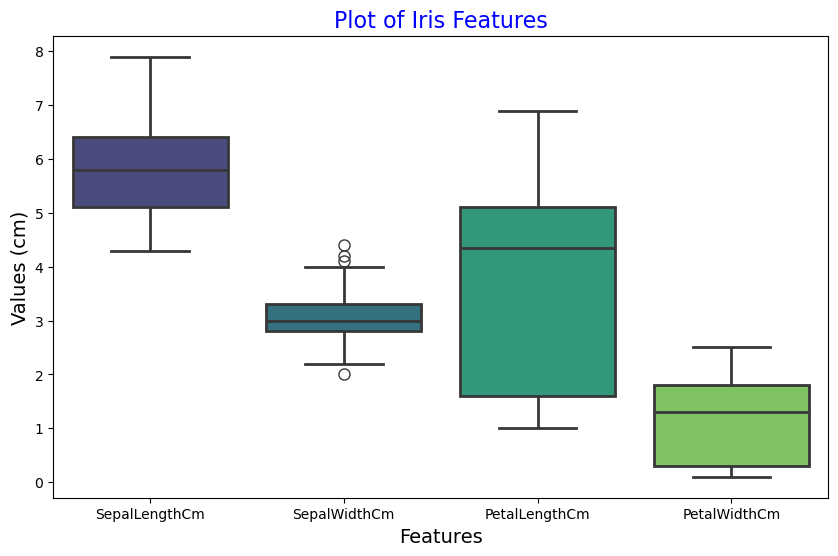

In [113]:
# create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data, palette="viridis", linewidth=2, fliersize=8)
plt.title('Plot of Iris Features', fontsize=16, color='blue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values (cm)', fontsize=14)
plt.show()